##How to Install TA-Lib in Google Colab:

In [11]:
!pip install numpy==1.26.3
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.3 which is incompatible.


In [12]:
!pip install textblob
!pip install pynance

In [1]:
%cd /content/drive/MyDrive/Tenx program/week-1

/content/drive/MyDrive/Tenx program/week-1


In [15]:
import sys
sys.path.append('/content/drive/MyDrive/Tenx program/week-1/scripts')

import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

from data_loader import load_stock_data
from indicator_calculator import calculate_all_indicators
from plot_utils import plot_stock_prices, plot_moving_averages, plot_rsi, plot_macd


In [18]:
stock_files = {
    "AAPL": "yfinance_data/AAPL_historical_data.csv",
    "AMZN": "yfinance_data/AMZN_historical_data.csv",
    "GOOG": "yfinance_data/GOOG_historical_data.csv",
    "META": "yfinance_data/META_historical_data.csv",
    "MSFT": "yfinance_data/MSFT_historical_data.csv",
    "NVDA": "yfinance_data/NVDA_historical_data.csv",
    "TSLA": "yfinance_data/TSLA_historical_data.csv"
}

stocks_data = {}

for stock, filepath in stock_files.items():
    df = load_stock_data(filepath)
    stocks_data[stock] = df
    print(f"Data for {stock} loaded successfully:")
    print(df.head(), "\n")
    print(df.describe(), "\n")
    print(df.info(), "\n")
    print(df[df['Close'].isnull()])
    print(df.dropna(subset=['Close'], inplace=True))
    print(df.isnull().sum())

Data for AAPL loaded successfully:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0   

                                Date          Open          High  \
count                          10998  10998.000000  10998.000000   
mean   2002-09-26 14:14:28.085106304     22.299160     22.539055   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              1991-10-28 06:00:00      0.2991

#### Calculate Financial Indicators

In [24]:
# SMA clearly calculated
df['SMA_50'] = df.ta.sma(close='Close', length=50)
print("============== SMA_50 ===============")
print(df[['Date', 'Close', 'SMA_50']].tail())
df['SMA_200'] = df.ta.sma(close='Close', length=200)
print("============== SMA_200 ===============")
print(df[['Date', 'Close', 'SMA_200']].tail())

# RSI clearly calculated
df['RSI_14'] = df.ta.rsi(close='Close', length=14)
print("============== RSI_14 ===============")
print(df[['Date', 'Close', 'RSI_14']].tail())

# MACD clearly calculated
macd_df = df.ta.macd(close='Close')
df = pd.concat([df, macd_df], axis=1)

# Explicitly remove rows with NaNs
df_cleaned = df.dropna().reset_index(drop=True)

# Verify clearly
print("After cleaning:", df_cleaned.shape)

# Verify indicators explicitly
print(df_cleaned[['Date', 'Close', 'SMA_50', 'SMA_200', 'RSI_14',
          'MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9']].head())


============== SMA_50 ===============
           Date       Close    SMA_50
3540 2024-07-24  215.990005  202.1838
3541 2024-07-25  220.250000  203.1510
3542 2024-07-26  219.800003  203.9960
3543 2024-07-29  232.100006  205.1582
3544 2024-07-30  222.619995  206.1138
============== SMA_200 ===============
           Date       Close    SMA_200
3540 2024-07-24  215.990005  205.24100
3541 2024-07-25  220.250000  205.03960
3542 2024-07-26  219.800003  204.84025
3543 2024-07-29  232.100006  204.68265
3544 2024-07-30  222.619995  204.48080
============== RSI_14 ===============
           Date       Close     RSI_14
3540 2024-07-24  215.990005  44.886918
3541 2024-07-25  220.250000  46.951389
3542 2024-07-26  219.800003  46.752165
3543 2024-07-29  232.100006  52.664511
3544 2024-07-30  222.619995  48.220474
After cleaning: (3346, 27)
        Date     Close    SMA_50   SMA_200     RSI_14  MACD_12_26_9  \
0 2011-04-12  1.643333  1.597293  1.581757  49.263004      0.040834   
1 2011-04-13  1.6620

In [26]:
df_cleaned.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Dividends,0
Stock Splits,0
SMA_50,0


In [27]:
print(df_cleaned[['Close']].describe())

             Close
count  3346.000000
mean     79.882739
std     103.815151
min       1.463333
25%      13.246167
50%      18.662666
75%     173.845001
max     409.970001


####Calculate Additional Financial Metrics with PyNance

In [30]:
for stock, df in stocks_data.items():
    # Ensure Close column is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df.dropna(subset=['Close'], inplace=True)

    # Clearly calculate indicators again to ensure correctness
    df['SMA_50'] = df.ta.sma(close='Close', length=50)
    df['SMA_200'] = df.ta.sma(close='Close', length=200)
    df['RSI_14'] = df.ta.rsi(close='Close', length=14)
    macd_df = df.ta.macd(close='Close')
    df = pd.concat([df, macd_df], axis=1)

    # Drop initial rows with NaNs explicitly
    df_cleaned = df.dropna().reset_index(drop=True)
    stocks_data[stock] = df_cleaned

    # Verify explicitly
    print(f"\n✅ Columns for {stock}: {df_cleaned.columns.tolist()}")
    print(df_cleaned.head())


✅ Columns for AAPL: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'Daily_Return', 'Cumulative_Return', 'SMA_50', 'SMA_200', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9']
        Date      Open      High       Low     Close  Adj Close    Volume  \
0 1981-09-29  0.067522  0.068080  0.067522  0.067522   0.052053  94684800   
1 1981-09-30  0.068080  0.068638  0.068080  0.068080   0.052483  49996800   
2 1981-10-01  0.068080  0.068638  0.068080  0.068080   0.052483  61129600   
3 1981-10-02  0.073661  0.074219  0.073661  0.073661   0.056785  45046400   
4 1981-10-05  0.075893  0.077009  0.075893  0.075893   0.058506  43097600   

   Dividends  Stock Splits  Daily_Return  Cumulative_Return    SMA_50  \
0        0.0           0.0      0.052171          -0.473915  0.093884   
1        0.0           0.0      0.008264          -0.469567  0.093103   
2        0.0           0.0      0.000000          -0.469567  0.092444   
3        0.0 

####Visualize Indicators and Prices Clearly


📊 Visualizing for AAPL


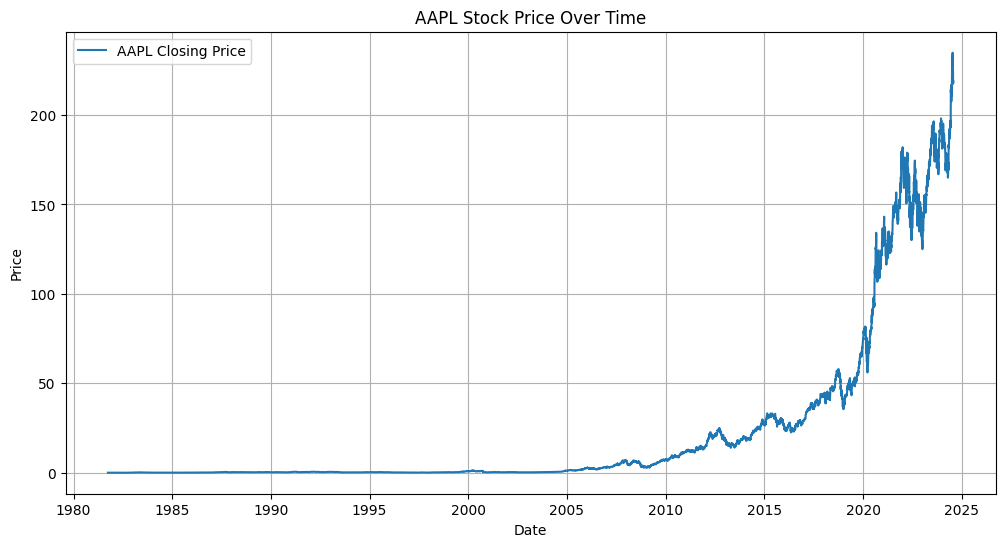

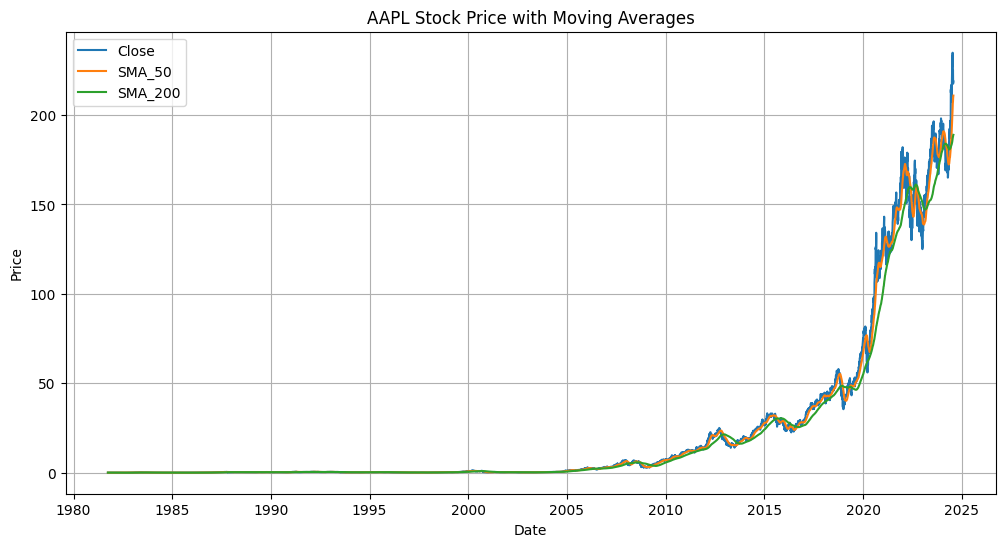

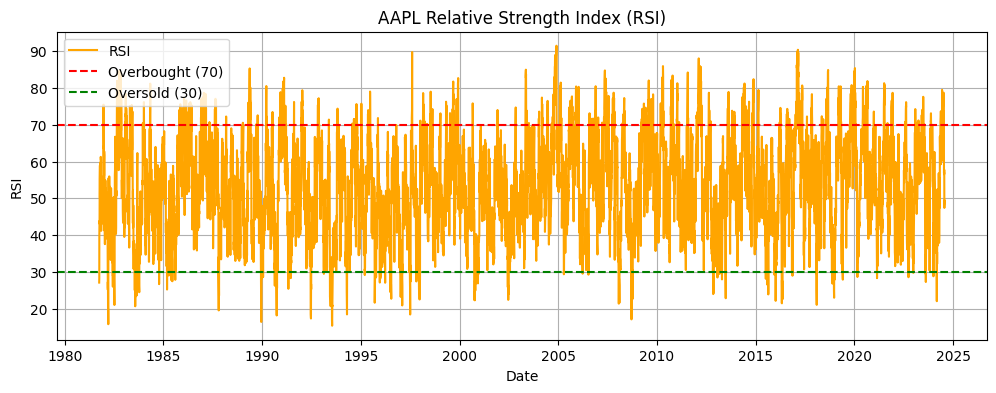

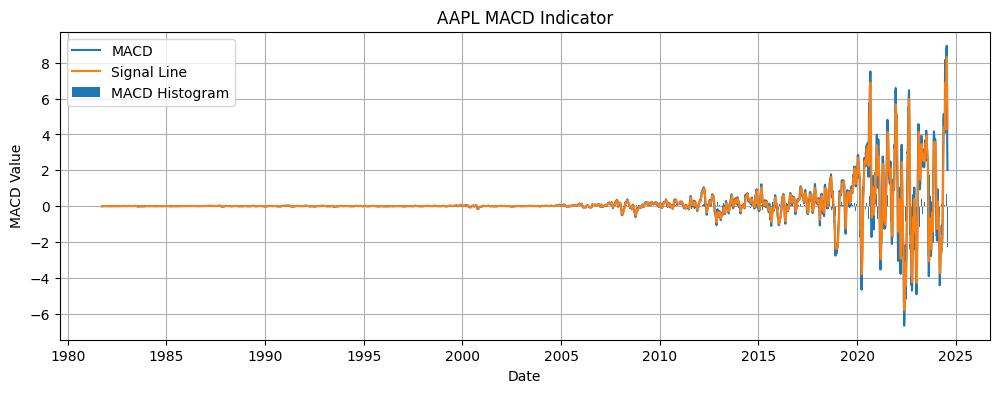


📊 Visualizing for AMZN


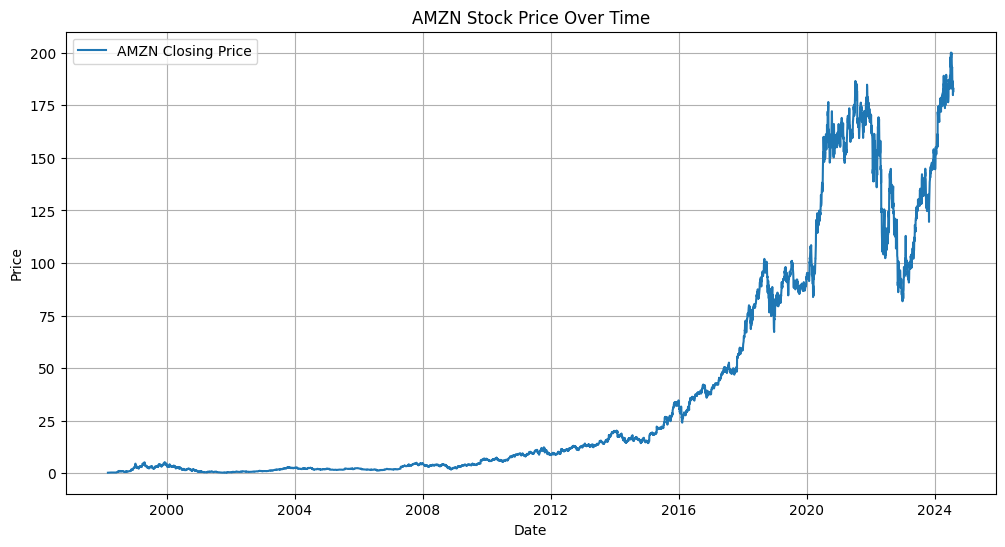

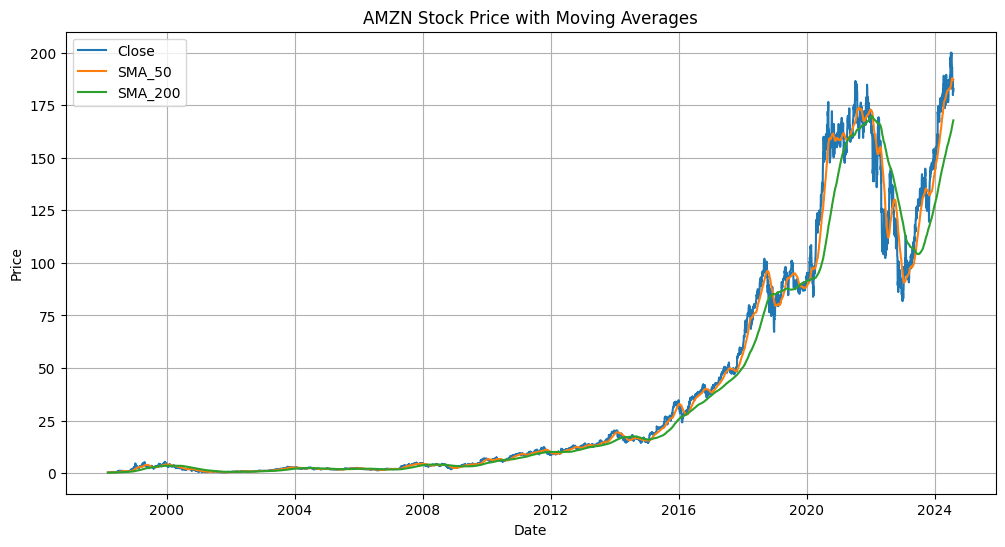

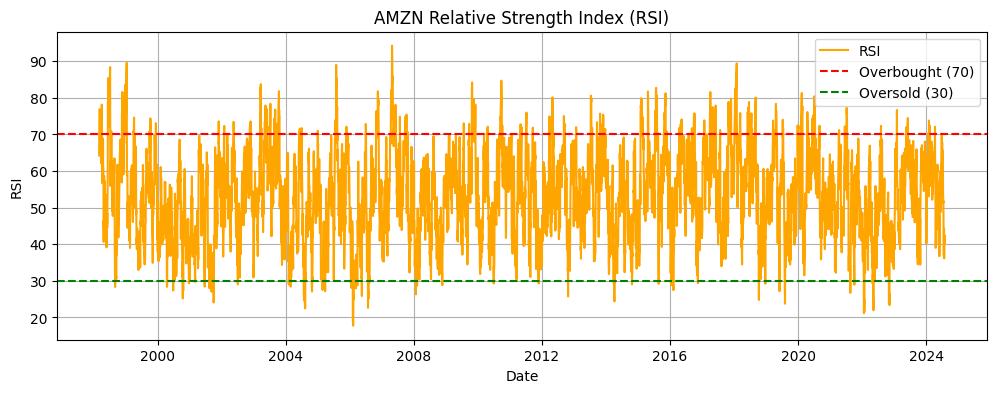

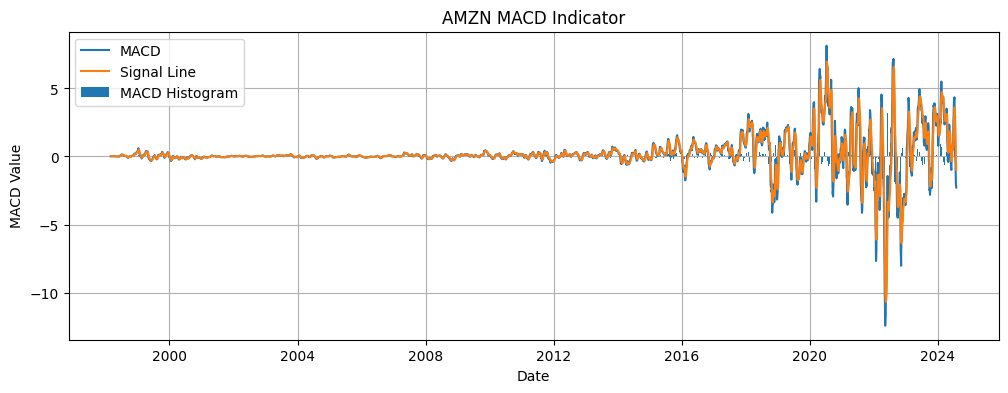


📊 Visualizing for GOOG


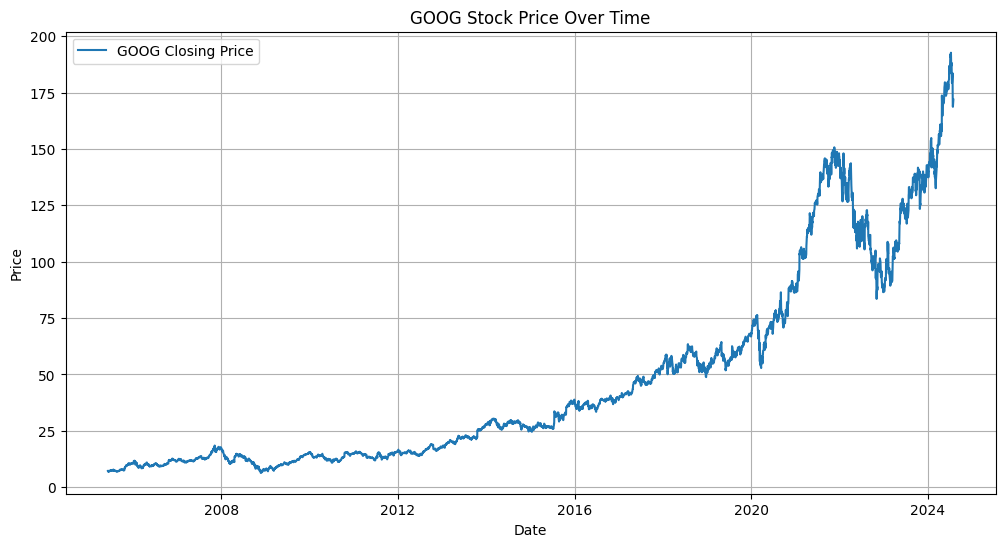

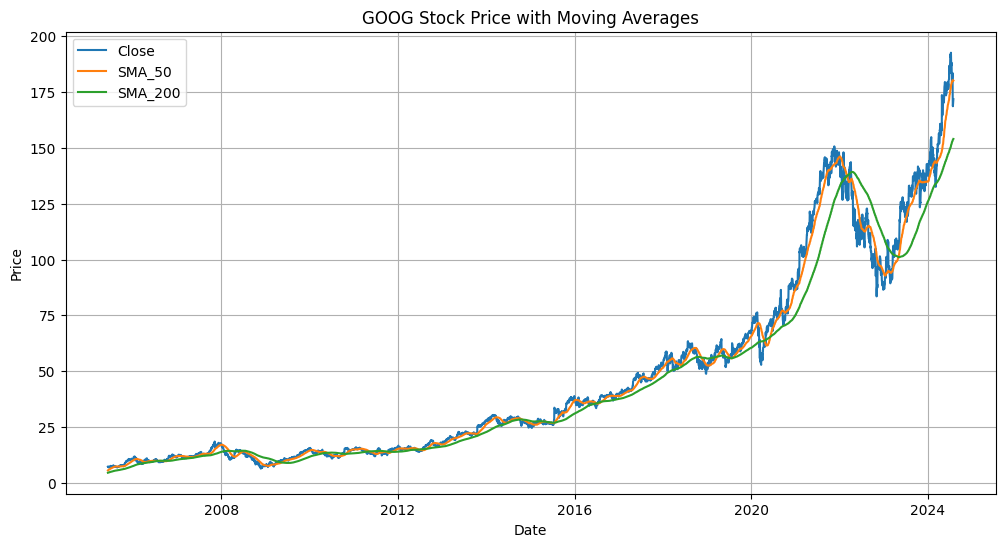

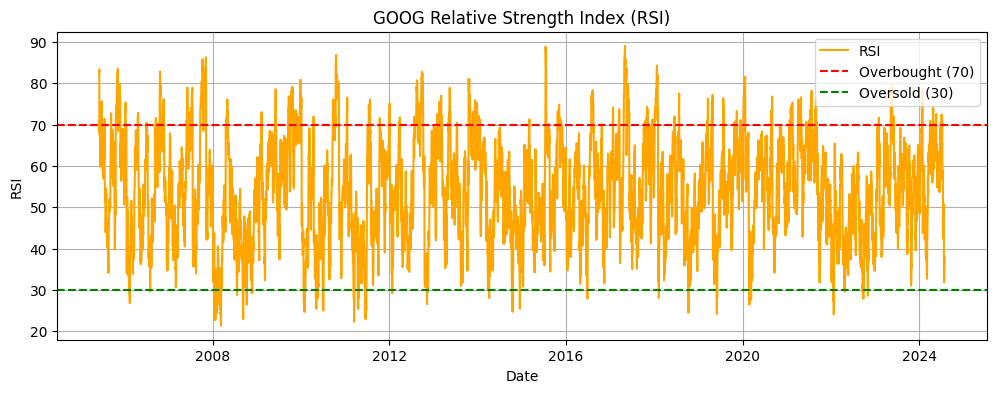

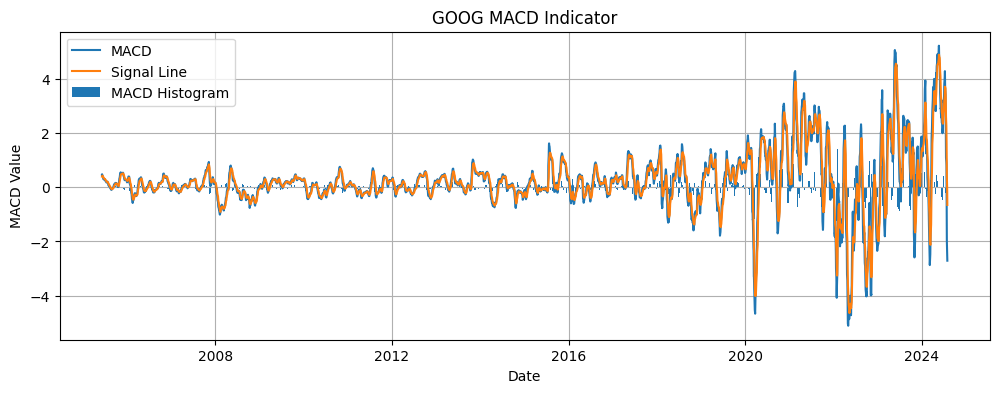


📊 Visualizing for META


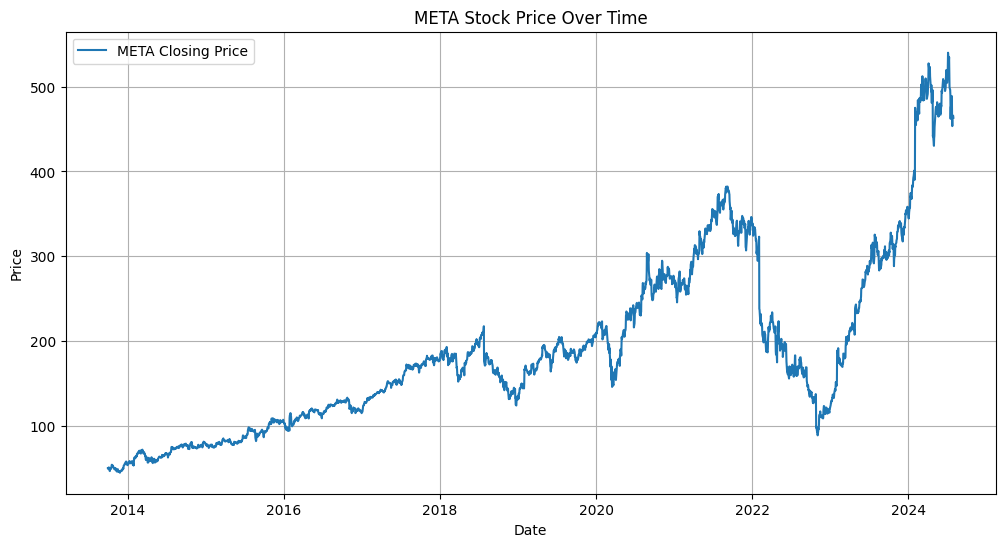

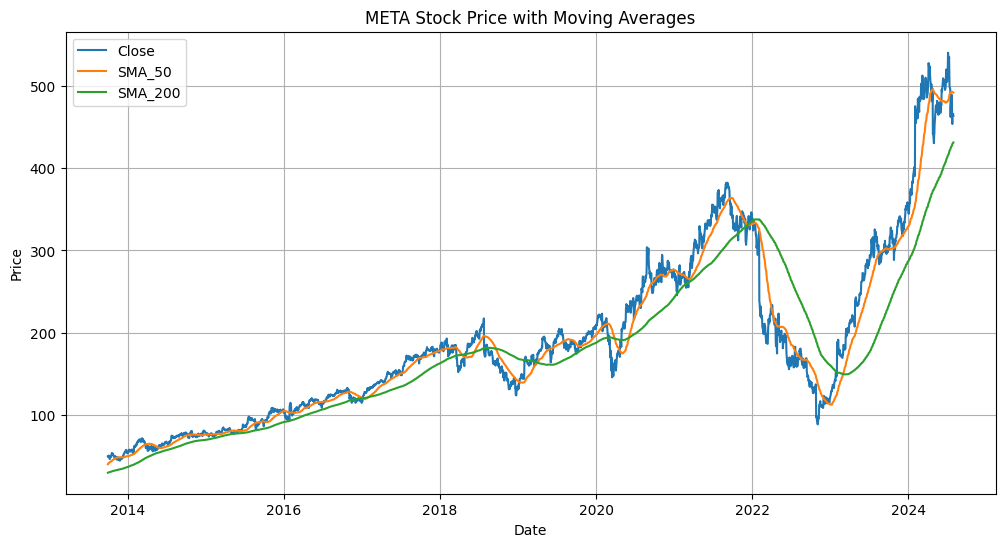

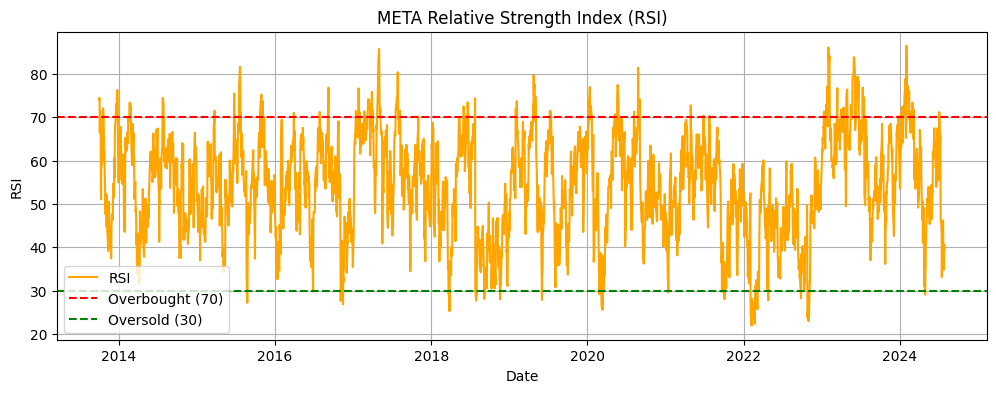

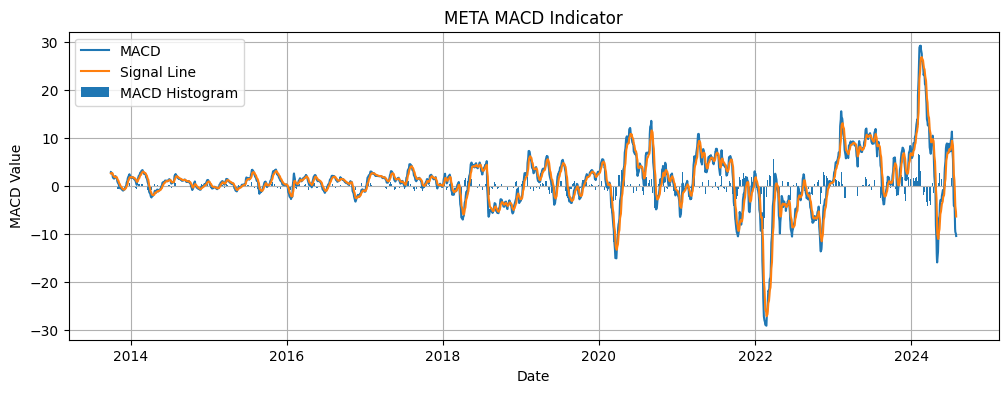


📊 Visualizing for MSFT


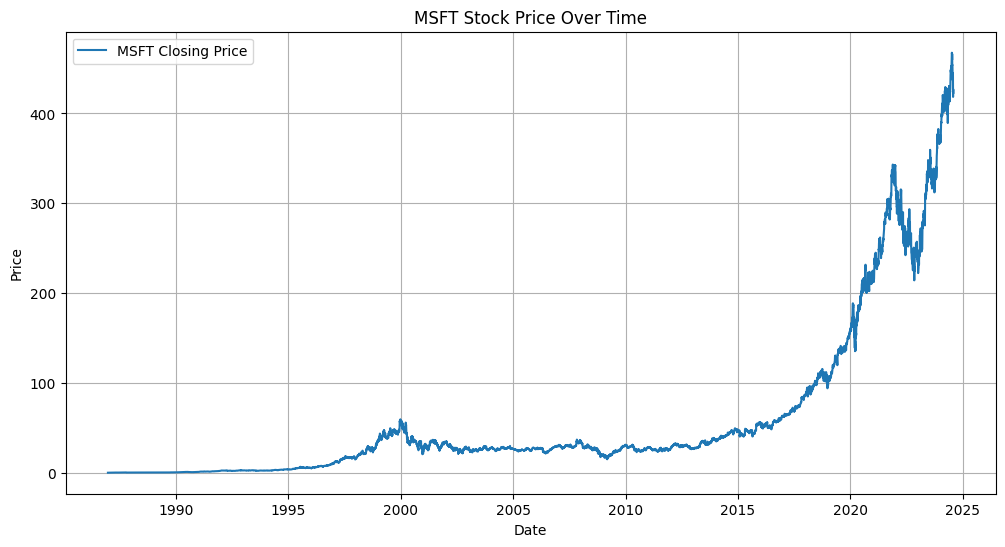

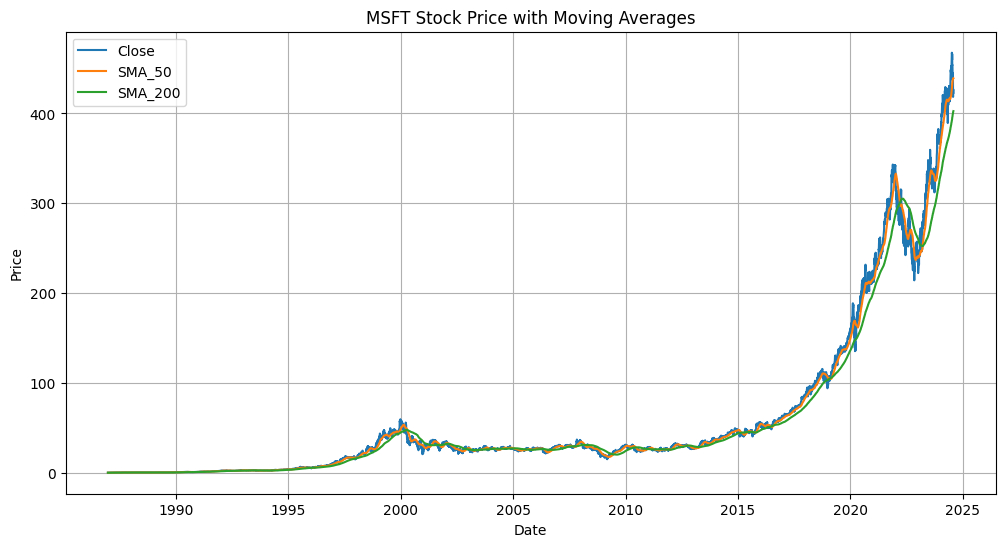

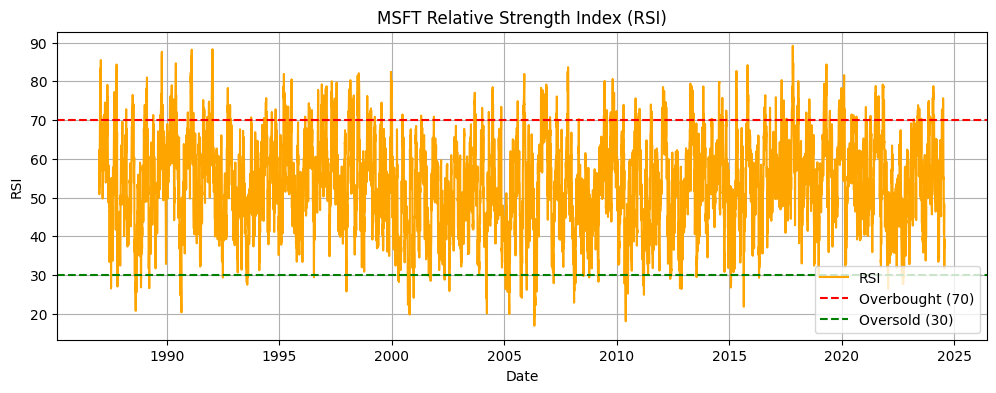

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


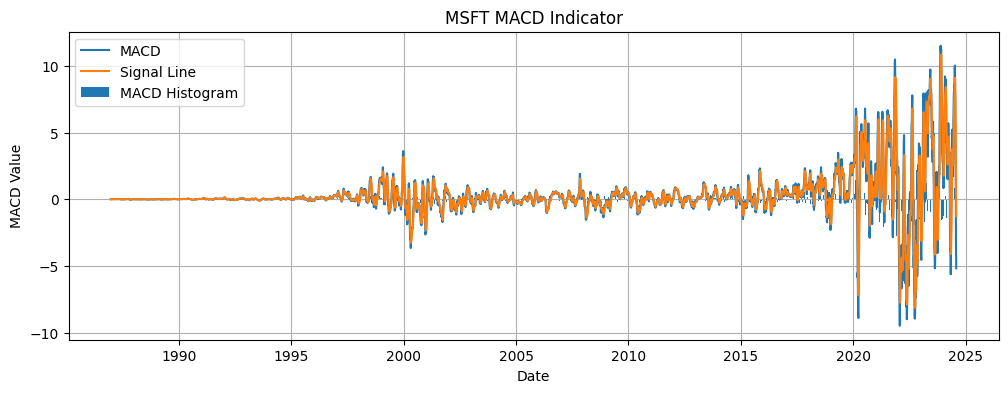


📊 Visualizing for NVDA


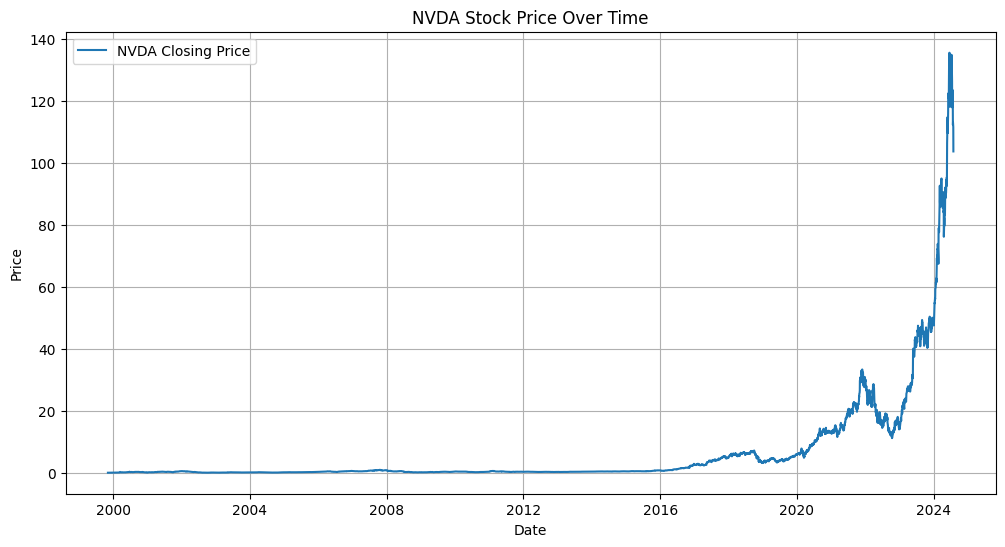

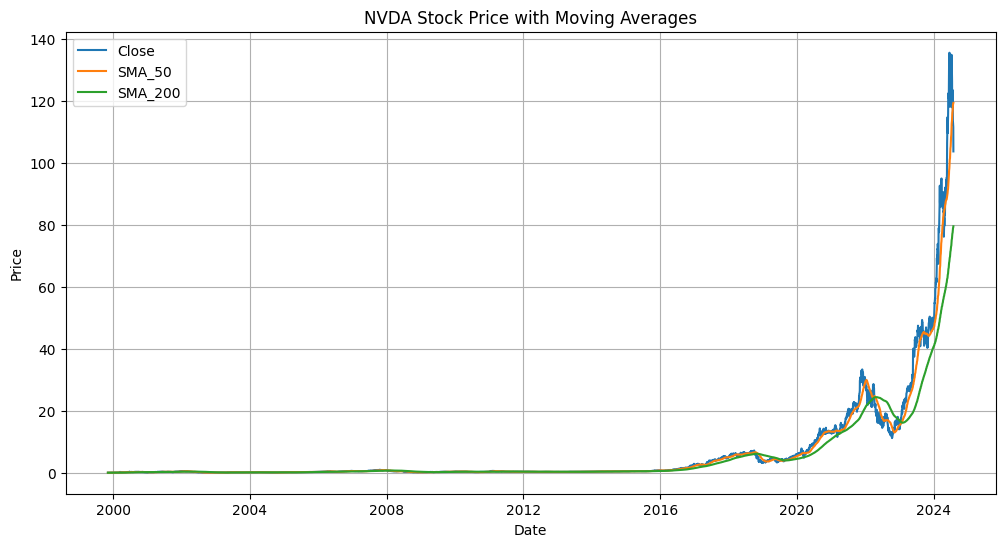

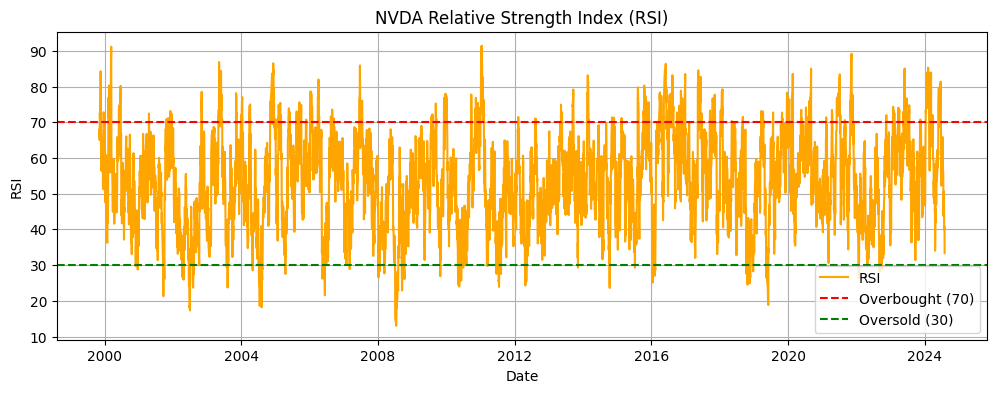

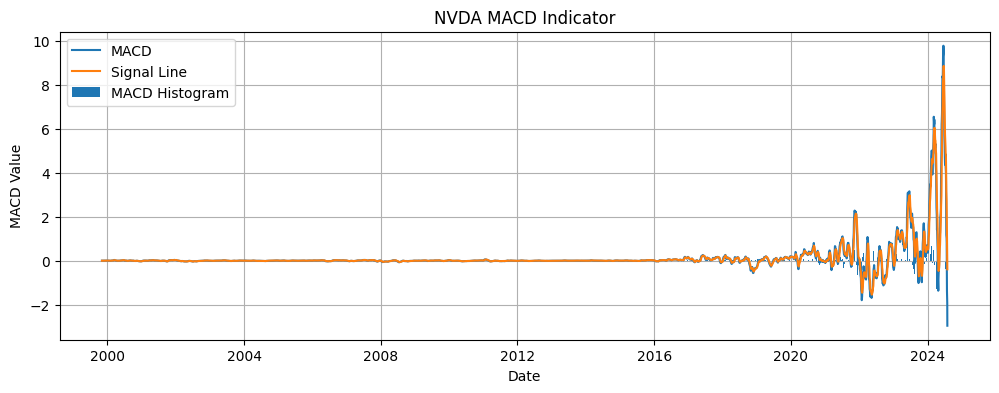


📊 Visualizing for TSLA


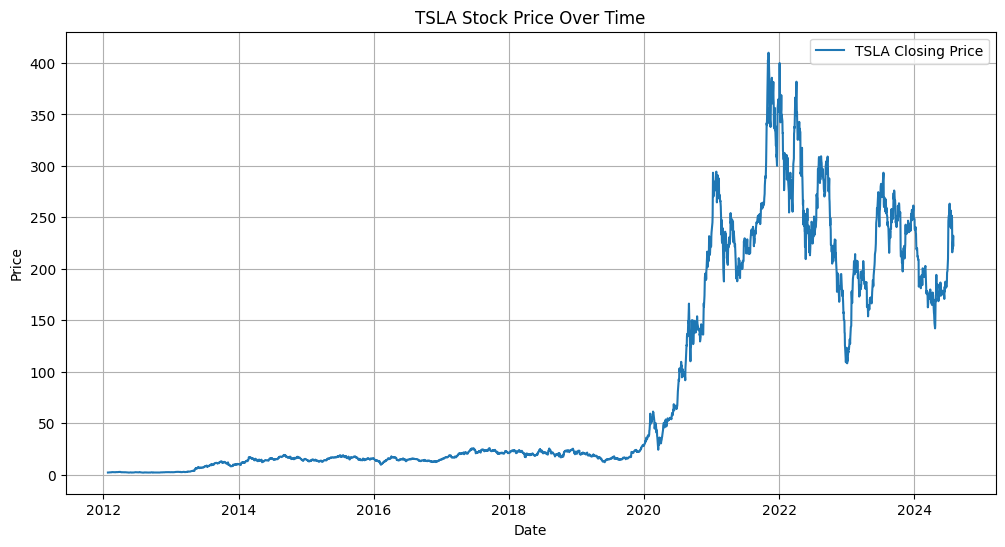

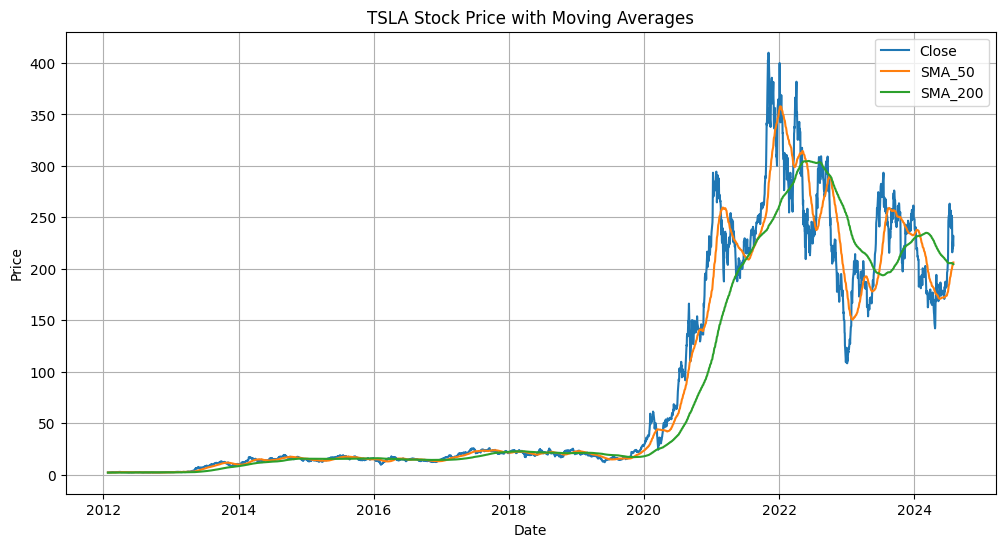

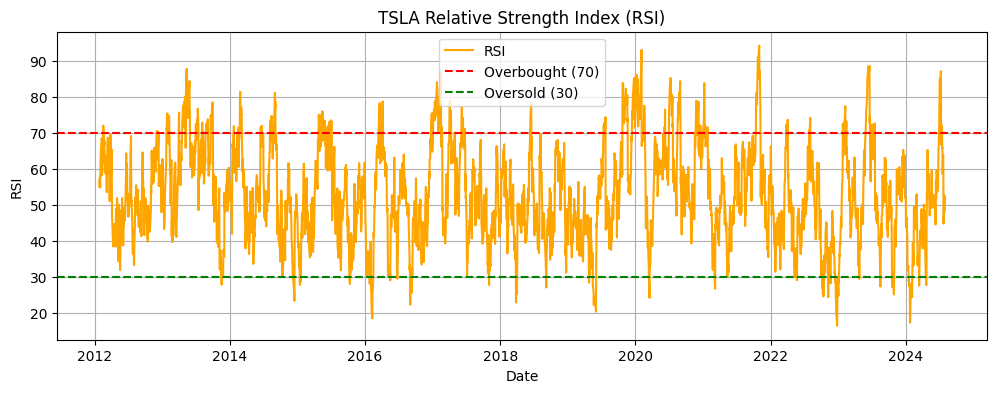

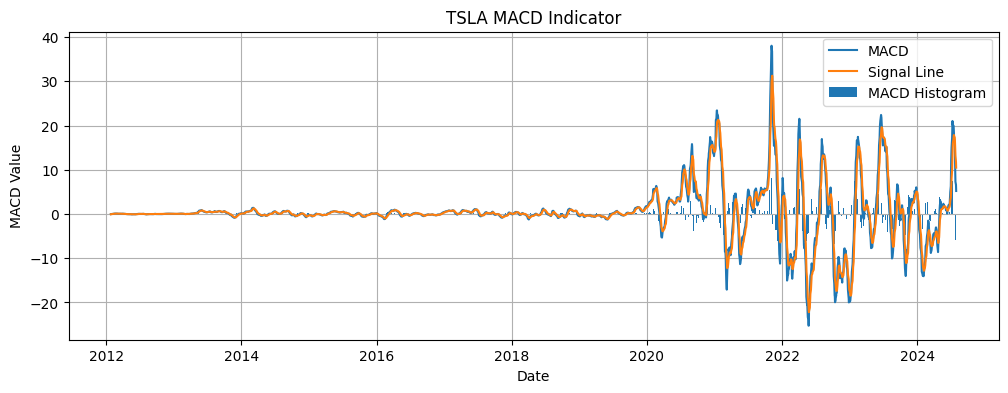

In [31]:
for stock, df in stocks_data.items():
    print(f"\n📊 Visualizing for {stock}")

    plot_stock_prices(df, stock_symbol=stock)

    plot_moving_averages(df, stock_symbol=stock, ma_columns=['SMA_50', 'SMA_200'])

    plot_rsi(df, stock_symbol=stock, rsi_column='RSI_14')

    plot_macd(df, stock_symbol=stock,
              macd_column='MACD_12_26_9',
              signal_column='MACDs_12_26_9',
              hist_column='MACDh_12_26_9')


####Save Processed Data Clearly (Optional)



In [32]:
for stock, df in stocks_data.items():
    df.to_csv(f"{stock}_quantitative_analysis.csv", index=False)